In [1]:
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from make_da_plots import make_base_plots, make_wind_base_plots
import importlib
from plot_driver import da_base_plots
import time_series as time_series
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import xarray as xr

/lfs5/BMC/wrfruc/gge/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', None) # so I can see all columns on the df

# Filter dataframe returned by PyGSI

## RTMA GSI diag files

In [34]:
variable = 't'
now_utc = datetime.now(timezone.utc)
ex_time = now_utc.replace(hour=0, minute=0, second=0, microsecond=0)
date_str = ex_time.strftime('%Y%m%d%H')
date_str = '2024072119' # Custom date

In [35]:
day_str = date_str[:8]
hour_str = date_str[-2:]

In [36]:
#temperature diag files jet
diag_ges_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_{variable}_ges.{date_str}.nc4.gz'
diag_anl_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_{variable}_anl.{date_str}.nc4.gz'

In [37]:
# #temperature diag files local
# diag_t_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
# diag_t_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

In [38]:
diag_ges_fp

'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.20240721/19/diag_conv_t_ges.2024072119.nc4.gz'

## Query data

In [39]:
diag_ges = Conventional(diag_ges_fp)
diag_anl = Conventional(diag_anl_fp)
df_ges = diag_ges.get_data()
df_anl = diag_anl.get_data()

## Filtering dataframes

### Set filter arguments

In [40]:
station_ids = ['NLOYR3BA']
obs_types_sur_temp = [181, 187, 188, 195]
obs_types_air_temp = [126, 133]
use = 1
elv_range = (0,20)
p_range = (500,1000)
err_range = (0, 4)

# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (251, 258) #to convert from deg west to deg east (360 - deg west)

In [41]:
# temp examples
# fil_dfs = filter_df([df_anl, df_ges], use = 1)
fil_dfs = filter_df([df_anl, df_ges], obs_types=obs_types_air_temp,
                    lat_range=co_lats,lon_range=co_lons)
    
df_anl_fil = fil_dfs[0]
df_ges_fil = fil_dfs[1]
print(len(df_anl_fil))
print(len(df_ges_fil))

712
712


## Testing base plots

### Testing non wind

In [42]:
make_base_plots([df_ges_fil, df_anl_fil], diag_ges.metadata, zoom=False, save_plots=True)

Creating Temperature plots...
Plots created successfully, saved to in plots/t_2024072119_plots folder


------------ Temperature Data Assimilation Statistics and Plots ------------




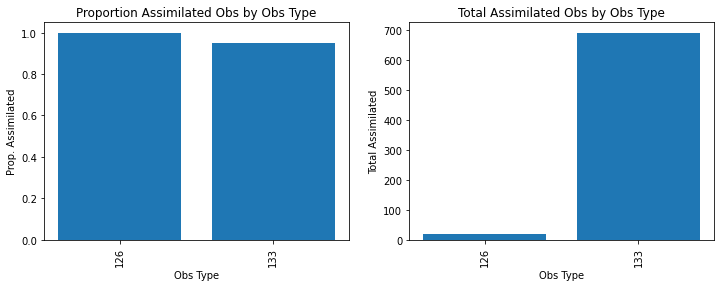

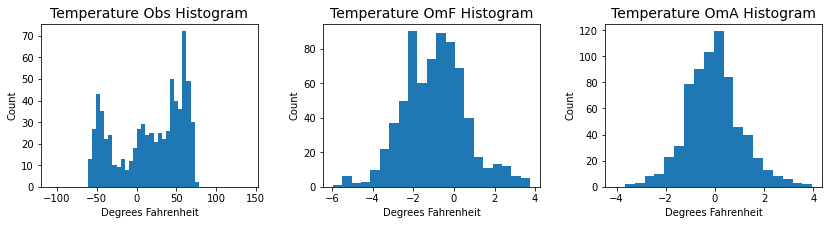

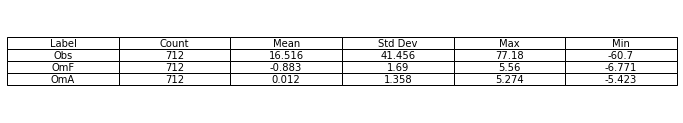

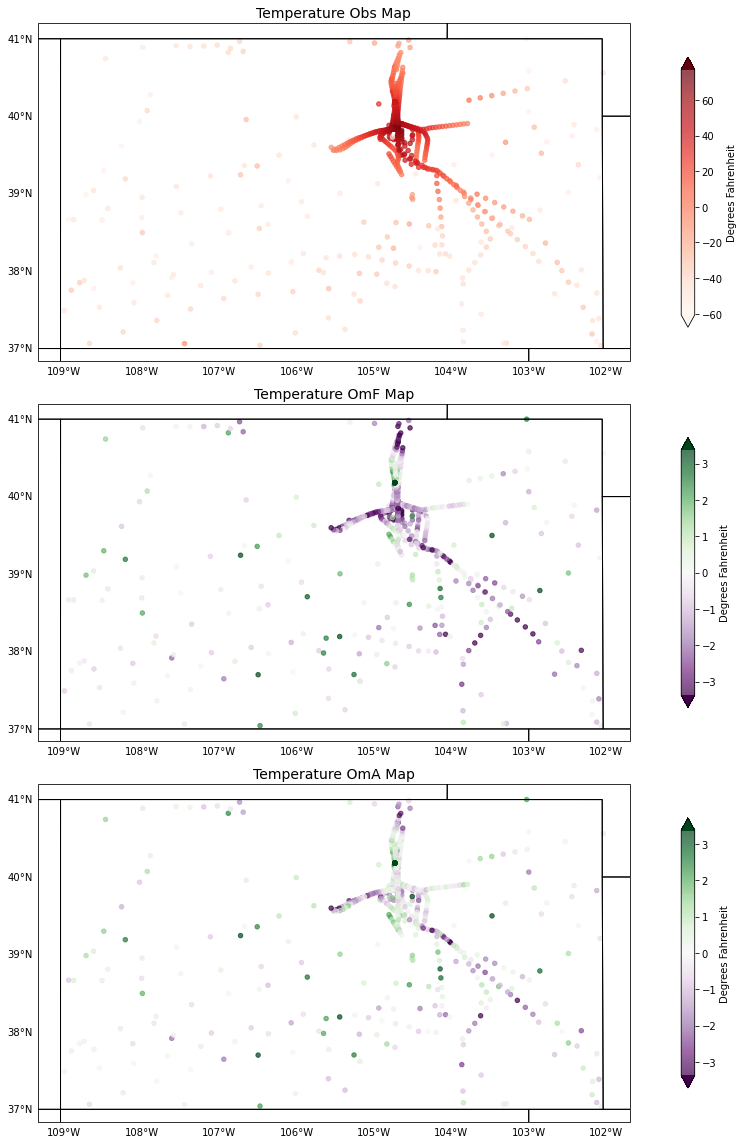

In [43]:
to_share_norm = make_base_plots([df_ges_fil, df_anl_fil], diag_ges.metadata, zoom=False)

# RRFS Diag Files

In [26]:
#temperature diag files jet
diag_ges_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/v0.9.5/com/prod/rrfs.{day_str}/{hour_str}/diag_conv_{variable}_ges.{date_str}.nc4.gz'
diag_anl_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/v0.9.5/com/prod/rrfs.{day_str}/{hour_str}/diag_conv_{variable}_anl.{date_str}.nc4.gz'

In [27]:
# #temperature diag files local
# diag_t_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
# diag_t_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

In [28]:
diag_ges_fp

'/lfs4/BMC/nrtrr/NCO_dirs/v0.9.5/com/prod/rrfs.20240721/19/diag_conv_t_ges.2024072119.nc4.gz'

## Query data

In [29]:
diag_ges = Conventional(diag_ges_fp)
diag_anl = Conventional(diag_anl_fp)
df_ges = diag_ges.get_data()
df_anl = diag_anl.get_data()

## Filtering dataframes

### Set filter arguments

In [30]:
# temp examples
# fil_dfs = filter_df([df_anl, df_ges], use =1)
fil_dfs = filter_df([df_anl, df_ges], obs_types=obs_types_air_temp,
                    lat_range=co_lats,lon_range=co_lons)

df_anl_fil = fil_dfs[0]
df_ges_fil = fil_dfs[1]
print(len(df_anl_fil))
print(len(df_ges_fil))

712
712


### Make plots

In [33]:
make_base_plots([df_ges_fil, df_anl_fil], diag_ges.metadata, save_plots=True, zoom=False)

Creating Temperature plots...
Plots created successfully, saved to in plots/t_2024072119_plots folder


------------ Temperature Data Assimilation Statistics and Plots ------------




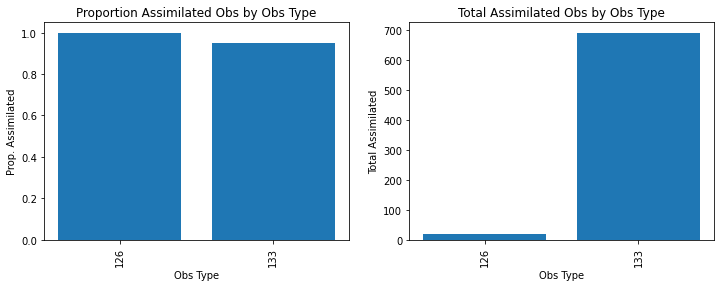

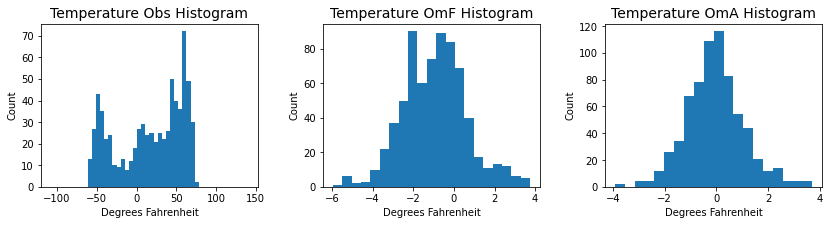

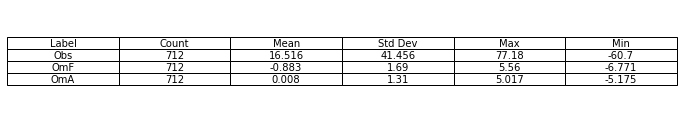

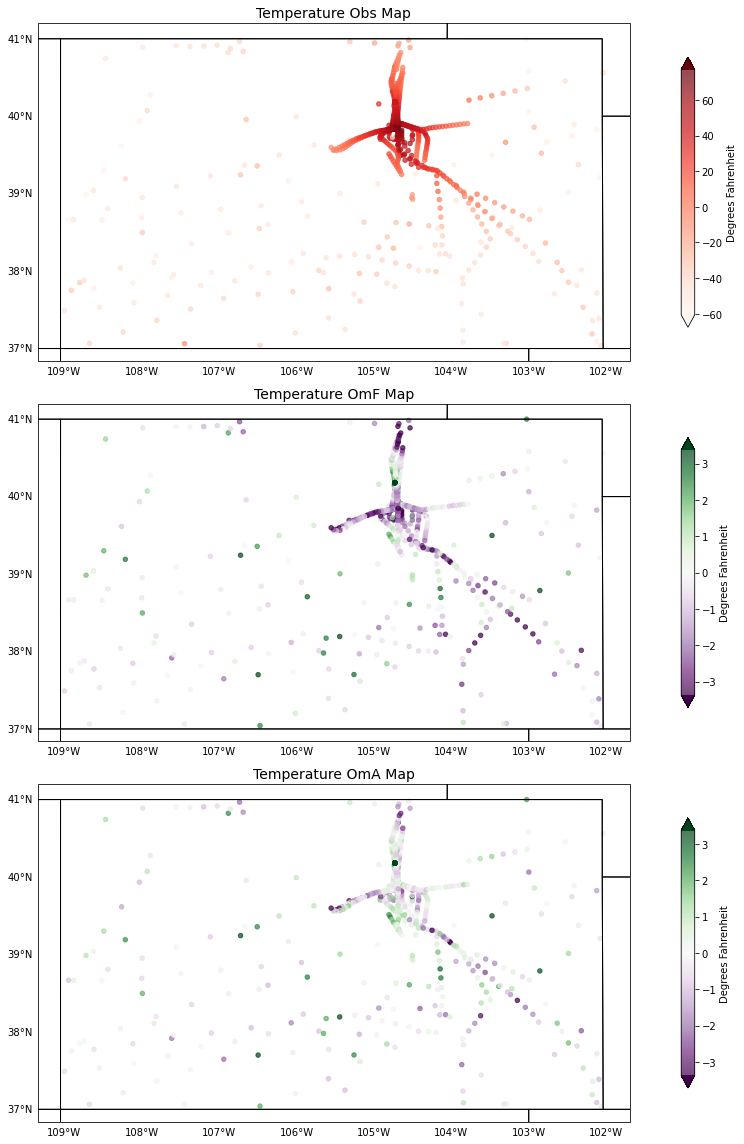

In [32]:
make_base_plots([df_ges_fil, df_anl_fil], diag_ges.metadata, shared_norm = to_share_norm, zoom=False)

## Wind plots

In [20]:
#wind diag files on jet
diag_uv_ges_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_uv_ges.{date_str}.nc4.gz'
diag_uv_anl_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_uv_anl.{date_str}.nc4.gz'

In [21]:
#wind diag files local
diag_uv_ges_fp = '../example_data/diag_conv_uv_ges.2024031812.nc4'
diag_uv_anl_fp = '../example_data/diag_conv_uv_anl.2024031812.nc4'

In [22]:
#Wind Diag file
diag_uv_ges = Conventional(diag_uv_ges_fp)
diag_uv_anl = Conventional(diag_uv_anl_fp)
df_uv_ges = diag_uv_ges.get_data()
df_uv_anl = diag_uv_anl.get_data()

In [26]:
# wind examples
# fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], hem='CONUS', use=1)
fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], lat_range=co_lats, lon_range=co_lons)

df_uv_anl_fil = fil_uv_dfs[0]
df_uv_ges_fil = fil_uv_dfs[1]
print(len(df_uv_anl_fil))
print(len(df_uv_ges_fil))

91
91


In [27]:
# make_wind_base_plots([df_uv_anl_fil, df_uv_ges_fil], diag_uv_ges.metadata, save_plots=True)

------------ Wind Data Assimilation Statistics and Plots ------------


Observation Type: 287

Proportion Assimilated: 0.791208803653717



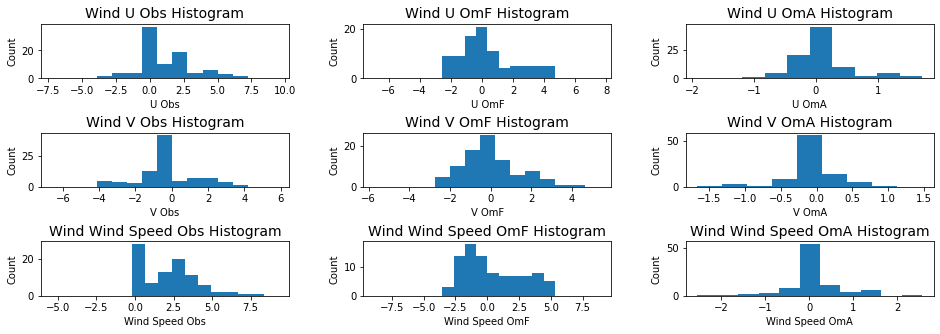

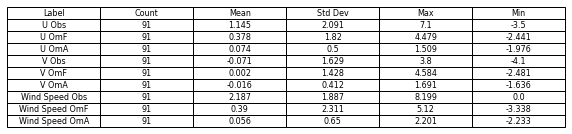

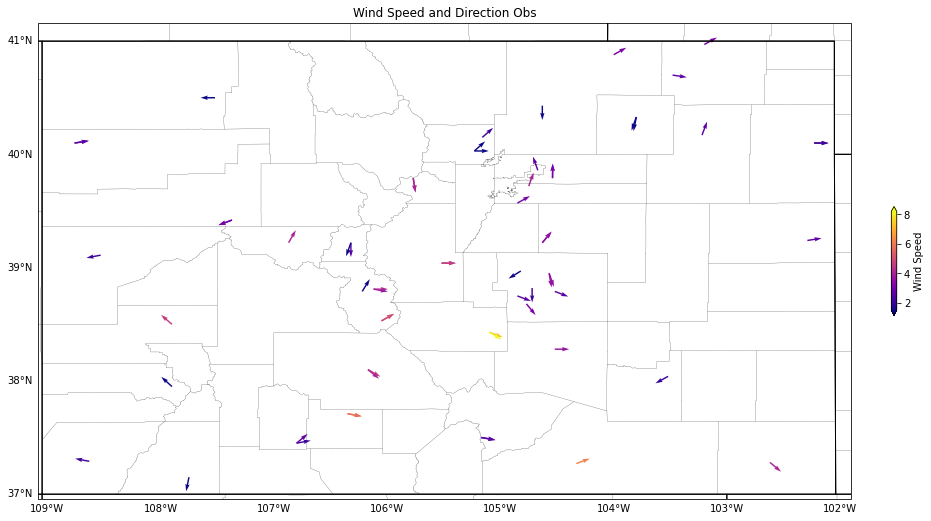

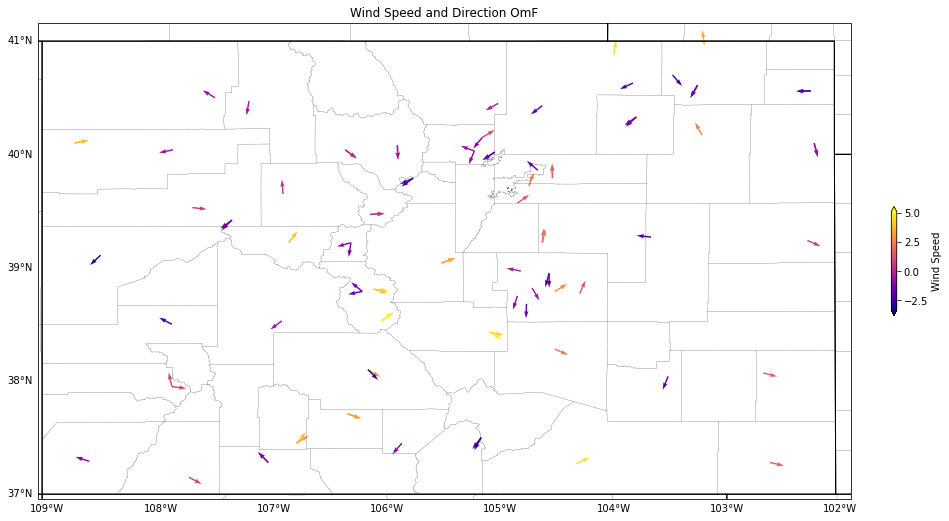

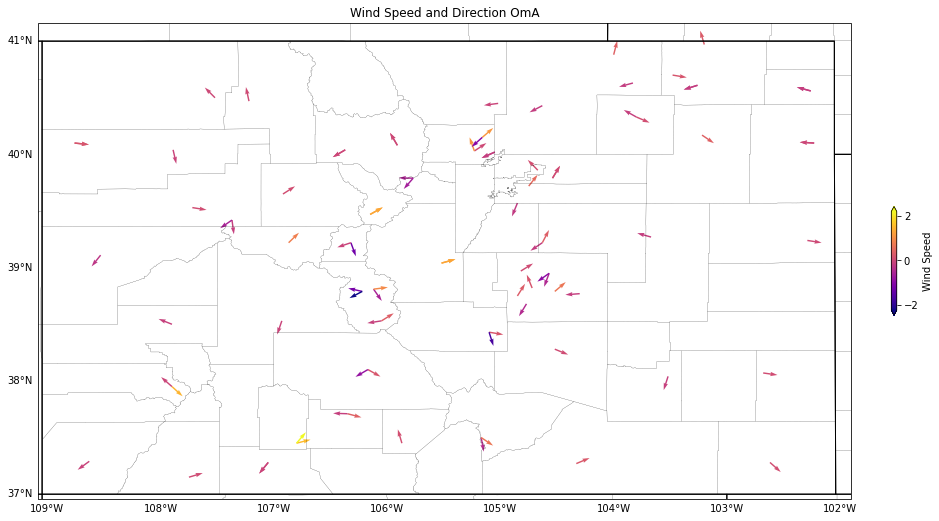

In [28]:
make_wind_base_plots([df_uv_ges_fil, df_uv_anl_fil], diag_uv_ges.metadata)

In [ ]:
# map_img = plt.imread('wind_2024031812_plots/wind_speed_direction_Obs_map.png')
# plt.figure(figsize = (15,10))
# plt.imshow(map_img)
# plt.axis('off')
# plt.show()

# Exploring time series plots

In [ ]:
# Get the yesterdays date
today = datetime.today()
yesteryesterday = today - timedelta(days=1)

# Format date
date = yesteryesterday.strftime('%Y%m%d')
print(date)

In [42]:
rrfs_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/v0.8.8/com/prod/"
rtma_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS." + date

NameError: name 'date' is not defined

## Dataframe for reference

In [43]:
# test_hr = '20'
# test_fp = f"{rtma_data_fp}/{test_hr}/diag_conv_t_anl.{date}{test_hr}.nc4.gz"
# test_df = Conventional(test_fp).get_data()

In [44]:
# station_ids = ['G4CUISJA']
station_ids = None
obs_types = None
rtma_path = '/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod'
rrfs_path = '/lfs4/BMC/nrtrr/NCO_dirs/v0.9.5/com/prod'

# Get a list of strings with all hours of daya
var = 't'

# Get the current date and time in UTC
now_utc = datetime.now(timezone.utc)
f_time = now_utc.replace(minute=0, second=0, microsecond=0)
s_time = f_time - timedelta(days=2)
s_time = s_time.replace(hour=0)

date_times = pd.date_range(start=s_time, end=f_time, freq='H')

Reading rtma_conus data...
Reading rrfs data...
Making plot..


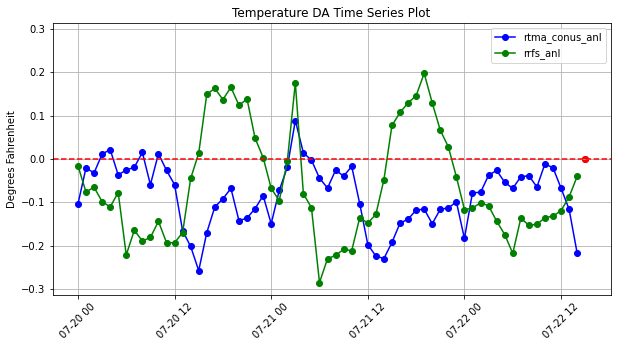

In [45]:
time_series.plot_time_series([rtma_path, rrfs_path], models = ['rtma_conus', 'rrfs'], 
                             var = var, anl_ges='anl', s_time=s_time, f_time=f_time)

## Testing command line plot making function

In [46]:
# path = '/Users/aidenpape/Desktop/noaa/code/pyDAmonitor/example_data' #aiden's laptop
path = '/lfs5/BMC/wrfruc/aiden.pape/pyDAmonitor/example_data' #jet
model = 'rtma'
date_time = '2024031812'
var = 't'

In [47]:
da_base_plots(path, model, date_time, var)

Reading and filtering data...
Data read successfully

Creating Temperature plots...
Plots created successfully, saved to in plots/t_2024031812_plots folder


## Try to read grib files